# Using Inception network and Transfer Learning to recognize handwritten months in Portuguese.

In [7]:
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.layers import Input
import pandas as pd
import os
import progressbar

import numpy as np
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [3]:
# input file
def build_features(model, file, size):
  arq = open(file,'r')
  conteudo_entrada = arq.readlines()
  arq.close()

  img_rows = size
  img_cols = size

  # InceptionV3
  # - weights='imagenet' (inicializa pesos pre-treinado na ImageNet)
  # - include_top=False (nao inclui as fully-connected layers)
  # - input_shape=(299, 299, 3) (DEFAULT) (minimo=75x75)
  #model = InceptionV3(weights='imagenet', include_top=True)


  X = []
  y = []

  print("Loading...", file)
  for i in progressbar.progressbar(conteudo_entrada):
    nome, classe = i.split()

    # loading image
    img_path = 'data/' + nome
    img = image.load_img(img_path, target_size=(img_rows,img_cols))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    # show image to network
    inception_features = model.predict(img_data)

    # flatten
    features_np = np.array(inception_features)
    X.append(features_np.flatten())
    y.append(int(classe))
    
  return X, y

In [4]:
size = 256
model = InceptionV3(include_top=False, weights='imagenet', pooling='avg', 
                    input_tensor=Input(shape=(size,size,3)))

X_train, y_train = build_features(model, 'train.txt', size)
X_test, y_test = build_features(model, 'test.txt', size)

N/A% (0 of 1578) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Loading... train.txt


100% (1578 of 1578) |####################| Elapsed Time: 0:05:01 Time:  0:05:01
  0% (1 of 401) |                        | Elapsed Time: 0:00:00 ETA:   0:01:02

Loading... test.txt


100% (401 of 401) |######################| Elapsed Time: 0:01:27 Time:  0:01:27


In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pylab as pl

/home/matheusbosa/Dev/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score: 0.7331670822942643
[[30  3  0  0  2  2  0  2  0  0  0  0]
 [ 6 22  0  0  1  0  0  0  1  0  0  2]
 [ 2  0 33  0  0  0  0  1  0  0  0  0]
 [ 0  0  0 30  8  0  1  0  0  0  0  0]
 [ 2  0  2  4 28  1  0  0  0  1  0  0]
 [ 3  0  1  0  2 18  3  0  2  0  0  0]
 [ 2  0  1  3  1  3 22  0  0  0  0  0]
 [ 0  0  0  2  0  0  0 26  0  0  0  0]
 [ 1  2  0  0  0  0  0  0 20  5  0  3]
 [ 0  0  1  3  1  0  0  0  1 24  0  0]
 [ 0  1  1  0  0  0  0  0  3  1 28  0]
 [ 1  2  1  0  0  1  0  5  6  0  4 13]]


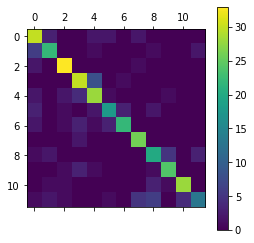

In [14]:
# classifier's train
#clfa = GaussianNB()
clfa = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial') # best choice
#clfa = RandomForestClassifier(n_estimators=100)
clfa = clfa.fit(X_train, y_train)

# testing
y_pred = clfa.predict(X_test)

# calculate accuracy
score = clfa.score(X_test, y_test)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Score:', score)
print(cm)
pl.matshow(cm)
pl.colorbar()
pl.show()